In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Data

In [3]:
df=pd.read_csv('dermatology_database_1.csv')

In [4]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


#Check Data Condition

In [5]:
df.shape

(366, 35)

In [6]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis',
       'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
       'clubbing_rete_ridges', 'elongation_rete_ridges',
       'thinning_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
       'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
       'band_like_infiltrate', 'age', 'class'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

## Check Data Consistency

In [8]:
df['age'].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

#**Split Data into Train and Test Data**

In [9]:
input_df=df.drop('class',axis=1)
output_df=df['class']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 0) # 20% test size sisanya train

In [11]:
print("shape X_train: ",x_train.shape)
print("shape X_test: ",x_test.shape)
print("shape y_train: ",y_train.shape)
print("shape y_test: ",y_test.shape)

shape X_train:  (292, 34)
shape X_test:  (74, 34)
shape y_train:  (292,)
shape y_test:  (74,)


# Cleansing Data

## Casting data type

In [12]:
x_train['age'] = pd.to_numeric(x_train['age'], errors='coerce') #paksa jadi null -> errors = coerce maka row jadi 292
x_test['age'] = pd.to_numeric(x_train['age'], errors='coerce')

In [13]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 63 to 172
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   erythema                             292 non-null    int64  
 1   scaling                              292 non-null    int64  
 2   definite_borders                     292 non-null    int64  
 3   itching                              292 non-null    int64  
 4   koebner_phenomenon                   292 non-null    int64  
 5   polygonal_papules                    292 non-null    int64  
 6   follicular_papules                   292 non-null    int64  
 7   oral_mucosal_involvement             292 non-null    int64  
 8   knee_and_elbow_involvement           292 non-null    int64  
 9   scalp_involvement                    292 non-null    int64  
 10  family_history                       292 non-null    int64  
 11  melanin_incontinence           

In [14]:
x_train['age'].isnull().sum()

6

## Missing Value Handling - Numeric Data

###**Check Outlier**

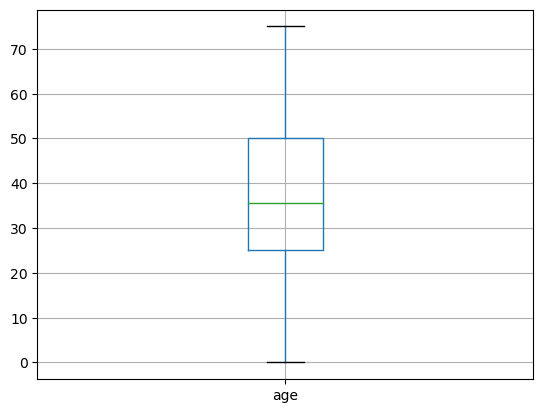

In [15]:
boxplot = x_train.boxplot(column=['age'])
plt.show() # kalo no outlier dan normal dist mean | kalo ada outlier dan skewed pake median 

In [16]:
#Calculate Mean for age
#Mean karna no outlier
print(np.mean(x_train['age']))

36.74825174825175


In [17]:
#Impute missing value with Mean
x_train['age'].fillna(36.7, inplace=True) # true = update df ori
x_test['age'].fillna(36.7, inplace=True)

# Building Model

In [18]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

DT_class = DecisionTreeClassifier()
DT_class.fit(x_train, y_train)
y_predict=DT_class.predict(x_test)
# kalo ada categorical boolean dll harus encoding dulu

# one hot encoding(fitur unik > 2)
# ordinal encoding(ada urutan misal level easy med hard)
# binary encoding(fitur unik = 2)


In [19]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['1','2','3','4','5','6']))


Classification Report

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        15
           2       0.92      0.86      0.89        14
           3       0.94      0.94      0.94        16
           4       0.86      1.00      0.92        12
           5       1.00      1.00      1.00         9
           6       1.00      0.50      0.67         8

    accuracy                           0.91        74
   macro avg       0.93      0.88      0.89        74
weighted avg       0.91      0.91      0.90        74



#Hyperparameter Tuning using GridSearchCV

In [20]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8], #coba2 disini kyk adjust K di KNN
    # coba2 depthn 2 4 6 8 karna blm tentu more or less better makanya coba2 dan cari yang palinbg bagus
}

In [21]:
DT_class2 = DecisionTreeClassifier()
DT_class2= GridSearchCV(DT_class2 ,
                            param_grid = parameters,   # hyperparameters
                            scoring='accuracy',        # metric for scoring
                            cv=5) # 5 = dicoba 5 kali masing2 20% (ideal)
#CROSS VALIDATION biar performa yang dilakukan ga bias makanya dicobain beda2 data test
# testing < training

In [22]:
DT_class2.fit(x_train,y_train)
print("Tuned Hyperparameters :", DT_class2.best_params_)
print("Accuracy :",DT_class2.best_score_)
# kita akan meliohat aaccuracy dari data testingnya buat nguji supaya ga overfitting

Tuned Hyperparameters : {'criterion': 'entropy', 'max_depth': 8}
Accuracy : 0.9555230859146698


In [23]:
#Train the data using based parameter
DT_class_best = DecisionTreeClassifier(criterion= 'gini',max_depth=8)

In [24]:
DT_class_best.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [25]:
y_predict_best=DT_class_best.predict(x_test)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_best, target_names=['1','2','3','4','5','6'])) # kelas dari target penyakit(1,2,3,4,5,6) dan hasil prediksi


Classification Report

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        15
           2       0.92      0.86      0.89        14
           3       0.94      0.94      0.94        16
           4       0.86      1.00      0.92        12
           5       1.00      0.89      0.94         9
           6       1.00      0.50      0.67         8

    accuracy                           0.89        74
   macro avg       0.92      0.86      0.87        74
weighted avg       0.91      0.89      0.89        74



: 

**Thank You**